![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 001 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 15/08/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0001Part002.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp

# Machine Learning

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=1ZmoK4qFlXs142kLBJeHSKig7DOKEnLIX'
DATA_FILE_NAME  = r'ImgData.mat'

TOTAL_RUN_TIME = 60 #<! Don't touch it!


## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Good Luck!

<font color='red'>Total run time must be **less than 60 seconds**</font>.

In [4]:
# Run Time
startTime = time.time()

## Team Members

 - `Ori_Blanka_208994764`.
 - `Or_Benson_308577345`.
 - `Alon_Hertz_315682773`.

## 4. Descent Methods

### Gradient Descent

Let $\boldsymbol{Y} \in \mathbb{R}^{d \times d}$ be a blurred version of the image $\boldsymbol{X} \in \mathbb{R}^{d \times d}$:

$$ \boldsymbol{Y} = \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} $$

Where $\boldsymbol{H} \in\mathbb{R}^{d \times d}$ is a known separable blurring matrix.

The goal is to find $\boldsymbol{X}$ that minimizes:

$$\boldsymbol{X}^{\star} = \arg \min_{\boldsymbol{X}} f \left( \boldsymbol{X} \right) = \arg \min_{\boldsymbol{X}} {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2}$$

## Generate / Load Data

Load the data: $\boldsymbol{Y}$ and $\boldsymbol{H}$.

In [5]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

In [6]:
dData = sp.io.loadmat(DATA_FILE_NAME)
mY    = dData['Y']
mH    = dData['H']

print(f'The image dimensions are: {mY.shape}')
print(f'The filter matrix dimensions are: {mH.shape}')

The image dimensions are: (256, 256)
The filter matrix dimensions are: (256, 256)


### Plot the Data

This sections illustrates the data.

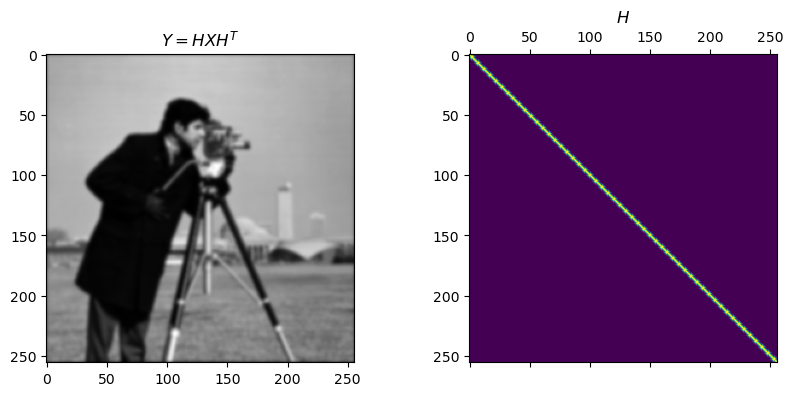

In [7]:
hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].matshow(mH)
hAs[1].set_title('$H$')

plt.show()

Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.  
You may assume $ H $ is invertible.

* <font color='brown'>(**#**)</font> A solution, numerically, can be found even for the cases $ H $ is not invertible.

### 4.1. Solution

${X}^{\star} = {H}^{-1}{Y}{H^T}^{-1}$

### 4.2. Task

Compute $\boldsymbol{X}^{\star}$ and plot it.

**Tip**: Avoid inverting the same matrix twice!

In [8]:
#===========================Fill This===========================#
# 1. Compute the optimal `mX` using the derivation.
# !! You may use `np.linalg.inv()` or better `np.linalg.solve()` or np.linalg.lstsq().
mX = np.linalg.solve(mH,mY@(np.linalg.inv(mH.T)))
#===============================================================#

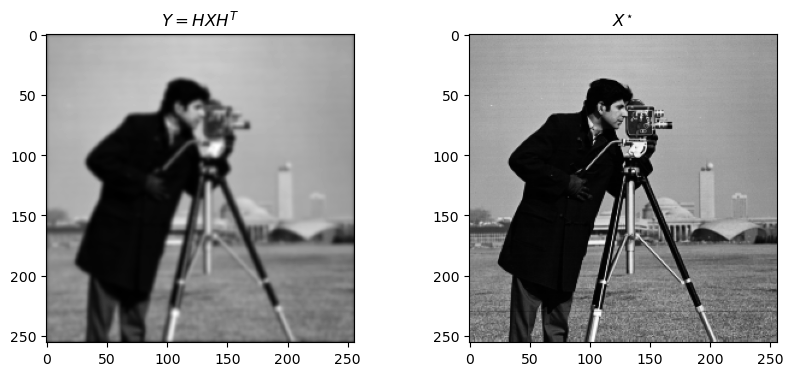

In [9]:
# Plot the Estimated Image

hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')

plt.show()

## Iterative Solution

In practice, for many real world problems, the direct solution can not be computed due to the inversion of a matrix.  
In such cases, the model is given by a sparse matrix and the solution is calculated by using only _matrix vector operations_ (Also called _MatVec_, namely matrix vector multiplication).  

In this section we'll implement such method based on the Gradient Descent.

Given the function:

$$ f \left( \boldsymbol{X} \right) = {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2} $$

### 4.3. Task

Implement the following functions:

```python
#==================================================#
def ObjF(mX):
#==================================================#
def GradF(mX):
#==================================================#
def ApplyGradientDescent(objF, gradF, mX0, μ, numIter, ε):
#==================================================#
```



In [10]:
#===========================Fill This===========================#
# 1. Implement the objective function.
# !! You may use `np.linalg.norm()` or the element wise definition of the Frobenius norm (See `np.linalg.inner()`).
def ObjF(mX: np.ndarray) -> float:
    '''
    f(X) = ||HXH^T - Y||_F^2 is the objective function
    '''
    return np.linalg.norm(mH.dot(mX).dot(mH.T) - mY)**2
#===============================================================#

In [11]:
#===========================Fill This===========================#
# 1. Implement the gradient of the objective function.
def GradF(mX: np.ndarray) -> np.ndarray:
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    
    gradient = 2*mH.T.dot(mH.dot(mX).dot(mH.T)-mY).dot(mH)
    return gradient
#===============================================================#

In [12]:
#===========================Fill This===========================#
# 1. Implement the gradient descent optimizer function.
def ApplyGradientDescent(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable).
        gradF   - Objective gradient function (Callable).
        mX0     - Initial point (Array).
        μ       - Step size / Learning rate (Float).
        numIter - Maximum number of iterations (Integer).
        ε       - Stopping criterion value (Float).
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List).
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''

    lF = []
    numPixels = mX0.size
    for i in range(1, numIter + 1):
        lF.append(objF(mX0))
        mX0 = mX0 - μ*GradF(mX0)
        if (np.linalg.norm(GradF(mX0)) < (numPixels * ε)):
            break
    
    return mX0, lF
#===============================================================#

### 4.3. Task

 - Set a reasonable initial point for `mX0`.
 - Set the parameter `μ`.
 - Set the parameter `numIter`.
 - Set the parameter `ε`.

In [13]:
#===========================Fill This===========================#
mX0     = mY.copy()
μ       = 0.95
numIter = 3000
ε       = 1e-8
#===============================================================#

### 4.4. Task

In the following section we'll use the function `ApplyGradientDescent()` to estimate the image `mX`.  

 - Optimize the parameters above to get a comparable result as fast as you can.
 - Time the run time of the function and the number of iterations required.

In [14]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescent()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.

# import itertools
# import concurrent.futures
# lrs = [1, 0.95, 0.9]
# εs = [1e-6, 1e-7, 1e-8]
# numIters = [1000, 3000, 5000]
# results = {}

# # Create all possible combinations of parameter values
# configs = list(itertools.product(lrs, εs, numIters))

# for lr, ε, numIter in configs:
#     start_time = time.time()

#     # Apply gradient descent here using efficient vectorized operations
#     mXIter, lF = ApplyGradientDescent(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=lr, numIter=numIter, ε=ε)

#     end_time = time.time()
#     run_time = end_time - start_time
#     results[(lr, ε, numIter)] = (run_time, lF[-1], len(lF))

start_time = time.time()
mXIter, lF = ApplyGradientDescent(ObjF, GradF, mX0, μ, numIter, ε)
end_time = time.time()

run_time = end_time - start_time
#===============================================================#

In [15]:
# start_vanilla = time.time()
# mXIter, lF = ApplyGradientDescent(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=0.95, numIter=3000, ε=1e-8)
# end_vanilla = time.time()

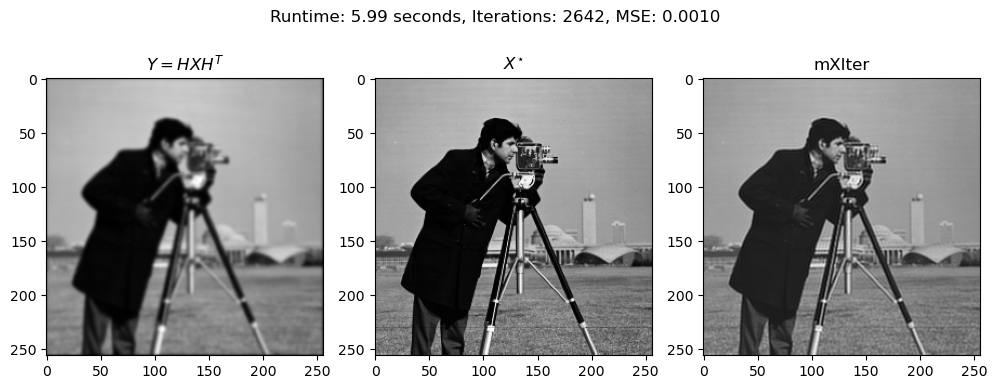

In [16]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX` and `mXIter`.
# 2. Calculate the MSE between `mX` and `mXIter`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE.

hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
hAs = hAs.flat
hF.suptitle("Runtime: {:.2f} seconds, Iterations: {}, MSE: {:.4f}".format(run_time, len(lF), ((mX-mXIter)**2).mean()))
hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')
hAs[2].imshow(mXIter, cmap = 'gray')
hAs[2].set_title("mXIter")
plt.tight_layout()
plt.show()
#===============================================================#

## Acceleration Methods  

The convergence speed of the 1st derivative method is sometimes very slow (Depends on the condition number of the model).  
For small problems one might use a 2nd order methods, yet those are more sensitive and require more calculations per iteration.

[Yurii Nesterov](https://en.wikipedia.org/wiki/Yurii_Nesterov), a Russian mathematician, an internationally recognized expert in convex optimization, was a pioneer in developing some approaches to [acceleration of 1st order methods](https://en.wikipedia.org/wiki/Gradient_descent#Fast_gradient_methods).  

In this section we'll implement such method, yet based on the [_momentum_ approach](https://en.wikipedia.org/wiki/Gradient_descent#Momentum_or_heavy_ball_method).

![](https://i.imgur.com/hFQv6Sa.png)

Let's compare the update rule of both methods:

 - Vanilla Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right)$.
 - Momentum Accelerated Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right) + \beta \left( \boldsymbol{x}^{\left( k - 1 \right)} - \boldsymbol{x}^{\left( k - 2 \right)} \right) $.  
   Where $\beta \in \left[ 0, 1 \right)$ (Typically $\beta \in \left[ 0.9, 0.99 \right]$).

The momentum method basically incorporate more data in order to optimize the direction of descent.

### 4.5. Question

Show that $\boldsymbol{x}^{\left( k \right)}$ can be expressed by:

$$\boldsymbol{x}^{\left( k + 1 \right)} = \boldsymbol{x}^{\left( k \right)} - \mu \sum_{l = 0}^{k} \beta^{k - l} \nabla f \left( \boldsymbol{x}^{\left( l \right)} \right)$$

* <font color='brown'>(**#**)</font> Basically, the update step is a combination of all (Weighted) previous steps.

### 4.5. Solution

Prove by induction:

**Base case**: 
n=1:

$\boldsymbol{x}^{\left(1\right)}=\boldsymbol{x}^{\left(0\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)+\beta\left(\boldsymbol{x}^{\left(0\right)}-\boldsymbol{x}^{\left(-1\right)}\right)$ 

Note that in the firs step it's hold that:
 $\boldsymbol{x}^{\left(0\right)}=\boldsymbol{x}^{\left(-1\right)}$

Therefore :
$\boldsymbol{x}^{\left(1\right)}=\boldsymbol{x}^{\left(0\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)$

$\boldsymbol{x}^{\left(1\right)} = \boldsymbol{x}^{\left(0\right)}-\mu\sum_{l=0}^{k=0}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)=\boldsymbol{x}^{\left(0\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)$, thus base case holds.


**Induction assumption**:
Assume that the claim holds for n=k. That is, suppose that: 

$\boldsymbol{x}^{\left(k\right)}=\boldsymbol{x}^{\left(k-1\right)}-\mu\sum_{l=0}^{k-1}\beta^{k-1-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$

**The induction step**:
We'll prove that the claim holds for n=k+1: 

$$\boldsymbol{x}^{\left(k+1\right)}=\boldsymbol{x}^{\left(k\right)}-\mu\sum_{l=0}^{k}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$$

$\boldsymbol{x}^{\left(k+1\right)}=\boldsymbol{x}^{\left(k\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)+\beta\left(\boldsymbol{x}^{\left(k\right)}-\boldsymbol{x}^{\left(k-1\right)}\right)$

$=\boldsymbol{x}^{\left(k\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)+\beta\left(\boldsymbol{x}^{\left(k-1\right)}-\mu\sum_{l=0}^{k-1}\beta^{k-1-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)-\boldsymbol{x}^{\left(k-1\right)}\right)$ 

and by the induction assumption we'll get:

$\boldsymbol{x}^{\left(k\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)-\mu\sum_{l=0}^{k-1}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$

Where $k=l$, it's hold that:
$-\mu\nabla f\left(\boldsymbol{x}^{\left(k\right)}\right)=-\mu\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$ 

And therefore:
$\boldsymbol{x}^{\left(k+1\right)}=\boldsymbol{x}^{\left(k\right)}-\mu\sum_{l=0}^{k}\beta^{k-l}\nabla f\left(\boldsymbol{x}^{\left(l\right)}\right)$

---

### 4.6. Task

Implement the following function:

```python
#====================================================#
def ApplyGradientDescentMomentum(objF, gradF, mX0, μ, β, numIter, ε):
#====================================================#
```

In [17]:
#===========================Fill This===========================#
# 1. Implement the momentum accelerated gradient descent optimizer function.
def ApplyGradientDescentMomentum(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, β: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable)
        gradF   - Objective gradient function (Callable)
        mX0     - Initial point (Array)
        μ       - Step size / Learning rate (Float)
        numIter - Maximum number of iterations (Integer)
        β       - Momentum decaying factor (Float)
        ε       - Stopping criterion value (Float)
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List)
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''

    lF = []
    X_1 = mX0
    X_2 = mX0
    numPixels = mX0.size
    for i in range(numIter):
        lF.append(ObjF(mX0))
        grad = GradF(mX0)
        mX0 = mX0 -μ*grad + β*(X_1 - X_2)
        X_2 = X_1
        X_1 = mX0
        if np.linalg.norm(grad) < (numPixels*ε):
            break
    return mX0, lF
#===============================================================#

### 4.7. Task

Repeat the above for the accelerated method:

 - Set the the same initial `mX0` as above.
 - Set the parameters for the `ApplyGradientDescentMomentum()` function.
 - Run the function, optimize parameters to converge as fast as you can while achieving similar result to `mX`.
 - Plot `mY`, `mX`, `mXIter`, `mXMomentum`. Write the MSE between `mXIter` and `mXMomentum` to `mX`, Write the number of iterations for each and the run time.

In [18]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescentMomentum()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.

μ_momentum       = 0.9
β                = 0.99
numIter_momentum = 2000
ε_momentum       = 1e-8

start_time_momentum = time.time()
mXMomentum, lF_momentum = ApplyGradientDescentMomentum(objF=ObjF, gradF=GradF, mX0=mY.copy(), μ=μ_momentum, β=β, numIter=numIter_momentum, ε=ε_momentum)
end_time_momentum = time.time()
run_time_momentum = end_time_momentum - start_time_momentum

#===============================================================#

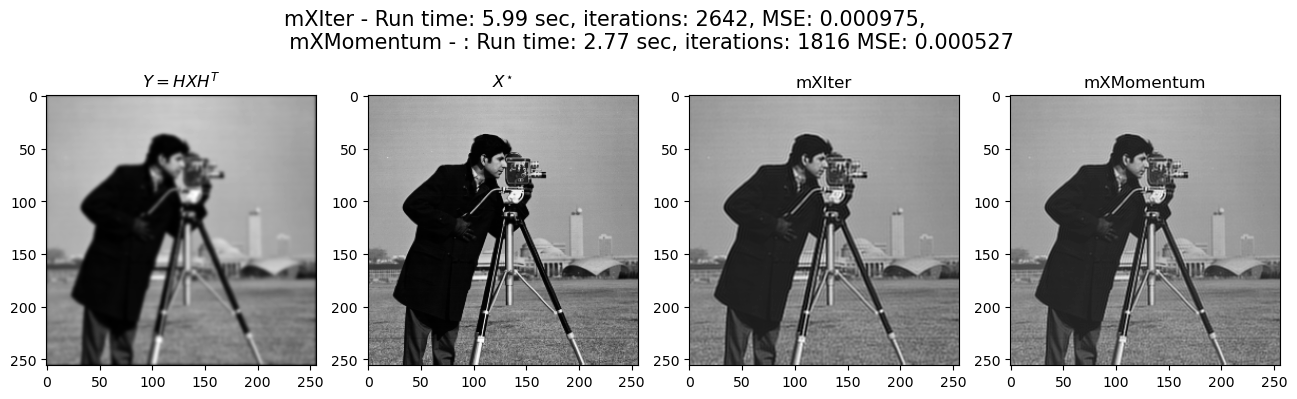

In [19]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX`, `mXIter` and `mXMomentum`.
# 2. Calculate the MSE between `mX` <-> `mXIter`, `mX` <-> `mXMomentum`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE (For `mXIter` and `mXMomentum`).

mse_iter = ((mX - mXIter) ** 2).mean()
MSE_momentum = ((mX-mXMomentum)**2).mean()
hF, hAs = plt.subplots(nrows = 1, ncols = 4, figsize = (13, 4))
hAs = hAs.flat
plt.title("hAs")
hF.suptitle(f"mXIter - Run time: {(run_time):.2f} sec, iterations: {len(lF)}, MSE: {mse_iter:.6f},\
            \n  mXMomentum - : Run time: {(run_time_momentum):.2f} sec, iterations: {len(lF_momentum)} MSE: {MSE_momentum:.6f}", size=15)

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')
hAs[2].imshow(mXIter, cmap = 'gray')
hAs[2].set_title("mXIter")
hAs[3].imshow(mXMomentum, cmap = 'gray')
hAs[3].set_title("mXMomentum")
plt.tight_layout()
plt.show()

#===============================================================#

### 4.8. Task

Plot the objective value function as a function of the iteration for both iterative methods.  

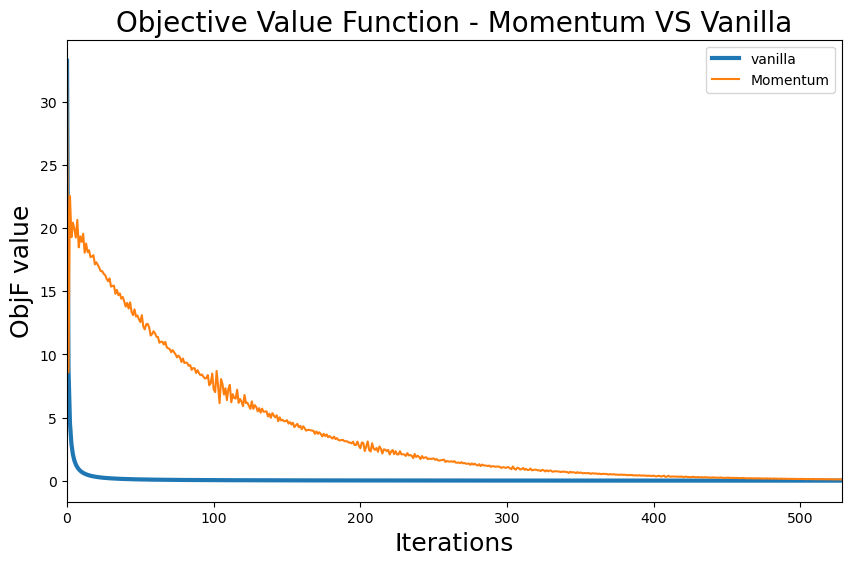

In [20]:
#===========================Fill This===========================#
# 1. Plot the objective value function as a function of the iteration index for both iterative methods.

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(range(len(lF)), lF, label="vanilla", linewidth=3)
ax.plot(range(len(lF_momentum)), lF_momentum, label="Momentum")
ax.set_xlim(xmin=0, xmax=len(lF)/5)
ax.set_title("Objective Value Function - Momentum VS Vanilla", size=20)
ax.set_xlabel("Iterations", size=18)
ax.set_ylabel("ObjF value", size=18)
plt.legend();
#===============================================================#

## 5. Numerical Gradient

There are methods to compute the gradient of a function numerically.  
The motivation for such calculation is:

 - The analytic gradient is not available.
 - A way to verify the analytic gradient.

This section uses the numerical gradient in order to verify the analytic gradient.

### 5.1. Question

Compute the directional derivative $\nabla f \left( \boldsymbol{x} \right) \left[ \boldsymbol{h} \right]$ and the gradient $\nabla f \left( \boldsymbol{x} \right)$ of:

$$ f \left( \boldsymbol{x} \right) = \frac{1}{2} {\left\| \boldsymbol{A} \operatorname{Diag} \left( \boldsymbol{x} \right) \boldsymbol{B} - \boldsymbol{Y} \right\|}_{F}^{2} $$

### 5.1. Solution

From defenition the directional derivative is:
$$
\nabla f \left( \boldsymbol{x} \right) \left[ \boldsymbol{h} \right] = \lim_{\epsilon \to 0} \frac{f(\boldsymbol{x} + \epsilon \boldsymbol{h}) - f(\boldsymbol{x})}{\epsilon}
$$

Define the matrix that we calculate the norm on it as: $ \boldsymbol{D} = \boldsymbol{A} \operatorname{Diag} \left( \boldsymbol{x} \right) \boldsymbol{B} - \boldsymbol{Y} $

Differentiating the function f with respect to $x_i$:
$$
\frac{\partial f}{\partial x_i} = \sum_{j} \sum_{k} \left( a_{ji} b_{ki} d_{jk} \right)
$$
where $d_{jk}$ is the (j,k)-th entry of $\boldsymbol{D}$.

Therefore, we get that the gradient is:
$$
\nabla f \left( \boldsymbol{x} \right) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

Update the directional derivative and gets: $ \nabla f \left( \boldsymbol{x} \right) \left[ \boldsymbol{h} \right] = \nabla f \left( \boldsymbol{x} \right) \cdot \boldsymbol{h} $  

---

The method of [Finite Difference Method](https://en.wikipedia.org/wiki/Finite_difference_method) allows to approximate the gradient using numerical methods.  
In this section we'll implement a function to calculate the objective function gradient numerically.  

The function we'll be used to verify the implementation of the analytic gradient.   
It will also be used to evaluate the sensitivity to the step size.


### 5.2. Task

 - Implement the function `def objF(vX, mA, mB, mY)`.
 - Implement the function `def GradF(vX, mA, mB, mY)`.
 - Implement the function `def CalcGradient(objF: Callable, vX: np.ndarray, h: float)`.  
   One should use _Central Finite Differences_ (See [Finite Difference Coefficient](https://en.wikipedia.org/wiki/Finite_difference_coefficient)) with 3 coefficients (Accuracy 2 on Wikipedia).
 - Plot the absolute value of the difference between the numerical and analytic functions for various `h`.

In [21]:
#===========================Fill This===========================#
# 1. Implement the objective function.
def ObjF(vX: np.ndarray, mA: np.ndarray, mB: np.ndarray, mY: np.ndarray) -> float:
    '''
    Calculate the objective function.
    Args:
        vX      - A point to calculate the objective function at (Vector).
        mA      - The matrix `A` (Matrix).
        mB      - The matrix `B` (Matrix).
        mY      - The matrix `Y` (Matrix).
    Output:
        objVal  - The objective function at `vX` (Vector).
    Remarks:
        - The output is a scalar.
    '''

    # Compute A * Diag(vX) * B 
    mDiagX = np.diag(vX)
    mAB = np.dot(mA, np.dot(mDiagX, mB))
    
    norm = np.linalg.norm(mAB - mY, 'fro')**2
    objVal = 0.5 * norm
 
    return objVal
#===============================================================#

In [22]:
#===========================Fill This===========================#
# 1. Implement the gradient of the objective function (Analytic).
def GradF(vX: np.ndarray, mA: np.ndarray, mB: np.ndarray, mY: np.ndarray) -> np.ndarray:
    '''
    Calculate the the gradient of the objective function.
    Args:
        vX      - A point to calculate the gradient at (Vector).
        mA      - The matrix `A` (Matrix).
        mB      - The matrix `B` (Matrix).
        mY      - The matrix `Y` (Matrix).
    Output:
        vG  - The gradient of the function at `vX` (Vector).
    Remarks:
        - A.
    '''

    
    # Compute A * Diag(vX) * B
    mDiagX = np.diag(vX) 
    mAB = np.dot(mA, np.dot(mDiagX, mB))
    
    # Gradient
    vG = np.diag(np.dot(mA.T, np.dot(mAB - mY, mB.T)))

    return vG
#===============================================================#

In [23]:
#===========================Fill This===========================#
# 1. Implement the function `CalcGradient()`.
#    Its input is a callable function (Objective function), the 
#    vector to calculate the gradient at and the step size.
#    Its output is teh numeric gradient at `vX`.
# 2. You should use Central Differences (2 evaluations).
def CalcGradient(objF: Callable, vX: np.ndarray, h: float) -> np.ndarray:
    '''
    Calculate the gradient of a function numerically.
    Args:
        objF    - Objective function (Callable).
        vX      - A point to calculate the gradient at (Vector).
        h       - Finite step size.
    Output:
        vG      - The gradient at `vX` (Vector).
    Remarks:
        - The objective function has a single input (Like `objF(vX)`).
        - Uses central differences.
    '''

    # Initialize gradient
    vG = np.zeros_like(vX)

    # Loop over dimensions
    for i in range(len(vX)):
        
        # Calculate central difference
        x_forw = vX.copy()
        x_forw[i] += h
        f_forw = objF(x_forw)
        
        x_back = vX.copy()
        x_back[i] -= h
        f_back = objF(x_back)
        
        vG[i] = (f_forw - f_back) / (2*h)

    return vG
#===============================================================#

In [24]:
# Plot
d = 5
numDataPts = 500

# Set the seed to stabilize results
seedNum = 246
np.random.seed(seedNum)

vX = np.random.randn(d) #<! The point ot evaluate at
mA = np.random.randn(d, d)
mB = np.random.randn(d, d)
mY = np.random.randn(d, d)

vH = np.logspace(2, -6, numDataPts) #<! Step Size
vE = np.zeros(numDataPts) #<! The error per h in vH

#===========================Fill This===========================#
# 1. Set the objective function as a single parameter function.
# 2. Set
# !! You may use Python's Lambda functions.
# !! Pay attention, the input to the gradient function should be a vector!
# !! Pay attention, Adjust the output of `GradF()` as needed.

hObjFun = lambda vX: ObjF(vX, mA, mB, mY)

for ii, h in enumerate(vH):
    vGAna = GradF(vX, mA, mB, mY) #<! Analytic Gradient
    vGNum = CalcGradient(hObjFun, vX, h) #<! Numeric Gradient
    vE[ii] = np.sqrt(np.sum(np.square(vGAna - vGNum)))


#===============================================================#

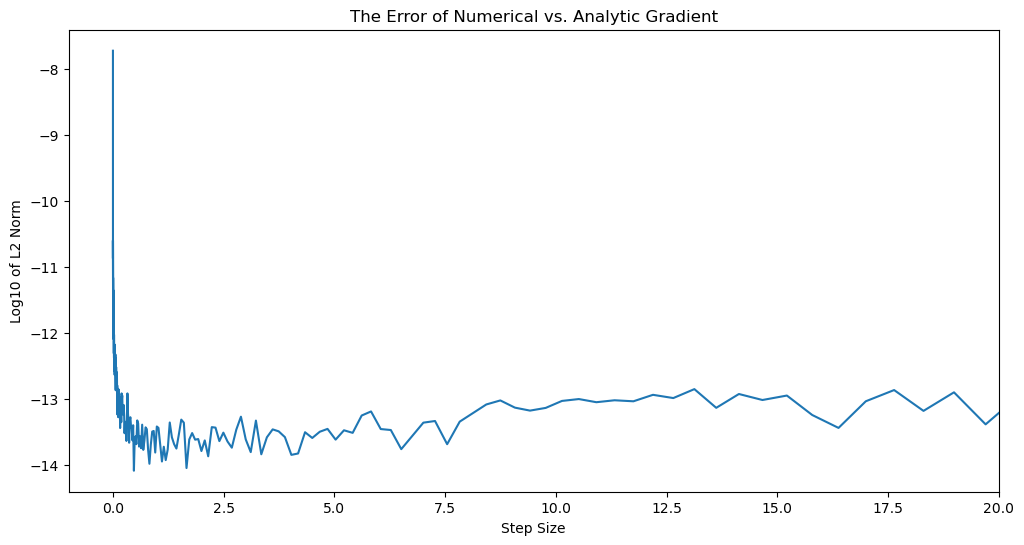

In [25]:
# Plot the Error Numeric vs. Analytic

hF, hA = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))

hA.plot(vH, np.log10(vE))
hA.set_title('The Error of Numerical vs. Analytic Gradient')
hA.set_xlabel('Step Size')
hA.set_ylabel('Log10 of L2 Norm')
hA.set_xlim((-1, 20))

plt.show()

#### 5.2.1. Question

Analyze the results above, specifically, address the following:

 * What's the optimal `h`?
 * Is smaller `h` better?
 * Can we use the same `h` for all data points?  
 * Can we use the same `h` for other objective functions?  

### 5.2.1. Solution

The optimal step size h balances two sources of error. A smaller h reduces the approximation error between the numerical and true gradients. However, an extremely small h increases numerical errors from finite precision arithmetic. The ideal h minimizes the total error.

While smaller h values tend to improve the approximation initially, the optimal h strikes a balance and avoids extremes.

Using the same h across data points is common for simplicity, but may not be optimal if the function's behavior varies significantly. The ideal h could differ across the function's domain.

Finally, the optimal h depends on the specific function. Different functions can have different ideal step sizes based on aspects like curvature, scaling, and dimensionality. It's recommended to search for the best h value when estimating gradients for new functions.

---

In [26]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 10.619517803192139 [Sec].
